#Modelos de machine learning para predizer o potencial de fármacos para atuar no sistema nervoso central
Guilherme Martins da Silva (silvagm@usp.br)

Projeto apresentado como desafio final do curso Imersão de Dados - 3ª Edição - ALURA, sob a temática *Data Science & Drug Discovery*

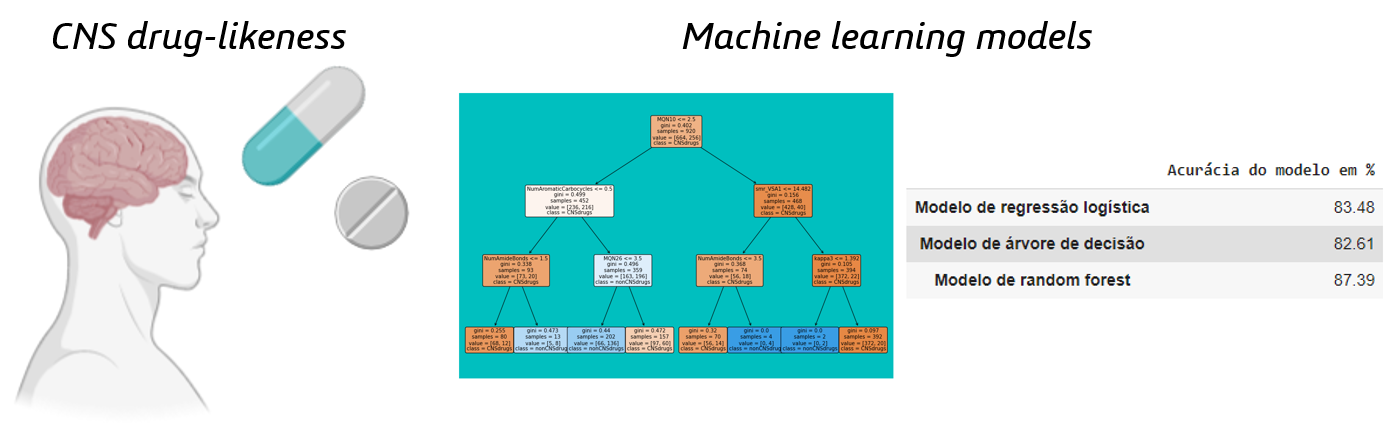

##Sobre o projeto

**Background:** O planejamento racional e descoberta de fármacos (do inglês "drug design & discovery") é um processo caro e demorado, levando de 10-20 anos e custando bilhões de dólares [1](https://link.springer.com/article/10.1007/s00210-016-1216-8). Nas etapas iniciais deste processo é imprescíndivel fazer o uso de técnicas computacionais que permitam guiar e predizer as propriedades desejáveis para um candidato a fármaco (composto químico) sob estudo [2](https://link.springer.com/article/10.1007/s10822-016-9993-1). 

*Drug-likeness* é um termo - tradução literal do inglês "fármaco-similar" - usado, de modo geral, para indicar o quão similar é determinado composto químico à fármacos já conhecidos [3](https://onlinelibrary.wiley.com/doi/abs/10.1002/3527603743.ch17). Tal similaridade é avaliada em termos de propriedades físico-químicas e características estruturais (chamados descritores), e pressupõe-se da ideia de que quanto mais parecido, maior a chance de determinado composto vir a se tornar um fármaco [4](https://doi.org/10.3797/scipharm.0802-05).

Para se predizer a *drug-likeness* de compostos, existem diversas abordagens que vão desde simples regras/critérios até o uso de modelos matemáticos e estatísticos preditivos e mais complexos. Neste contexto, considerando o grande número de dados disponíveis atualmente, principalmente de diferentes descritores, o uso de machine learning torna-se bastante relevante [5](https://doi.org/10.3389/fchem.2018.00162). 

**Objetivo e metodologia:** Neste projeto, busquei desenvolver modelos de machine learning com vista à predição do potencial de novos compostos virem a ser fármacos que atuem no sistema nervoso central (SNC), ou seja, candidatos a fármacos para doenças neurodegenerativas e demais disturbios psiquiátricos, tais como doença de Alzheimer, Parkinson, depressão, ansiedade, dentre outras. 

Para isso foi usado uma série de 1150 compostos previamente classificados como drogas do SNC (ou CNS drugs) e drogas sem habilidade de atuar no SNC (non-CNS drugs), extraídas da literatura [6](http://dx.doi.org/10.1021/acs.jmedchem.8b01388). Calculou-se os descritores químicos destes compostos usando o nodo RDKit implementado no Knime [7](http://www.rdkit.org) e foram usadas as seguintes técnicas de machine learning: regressão logística, árvore de decisão e *random forest*. Todos os modelos foram validadios com respeito as respectivas acurácias, a partir do uso de séries de treinamento e teste, bem como comparando-se com um modelo ingênuo que fora gerado.

**Resultados e conclusões:** Os 3 modelos obtidos apresentaram acurácias acima de 80%, com destaque para o modelo de random forest com 87% de acurácia. Demais refinamentos deverão ser feitos considerando-se as boas práticas de modelagem em estudos com essa finalidade.


## Análise preliminar dos dados

Usei uma série de compostos previamente reportada na literatura [6](http://dx.doi.org/10.1021/acs.jmedchem.8b01388). Primeiramente, os dados foram copiados do artigo para uma planilha excel, organizando-se uma tabela com nomes e estruturas químicas (formato SMILES). Adicionei uma terceira coluna com os valores de classificação binária de acordo com suas habilidades de atuar como drogas do SNC (ou CNS drugs) ou drogas sem habilidade de atuar no SNC (non-CNS drugs), ou seja, 1 para CNS-drugs e 0 para non-CNS drugs. 

Esta tabela foi então importada no Knime, para cálculo de seus descritores químicos, a partir dos respectivos SMILES e utilizando o nodo RDKit [7](http://www.rdkit.org). Foram gerados 117 descritores para cada composto conforme a tabela apresentada a seguir.


In [52]:
import pandas as pd

url_dados = 'https://github.com/guimsilvaa/imersao-dados-desafio-final/blob/main/Dados/dataset_1150_rdkit.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')
dados

,Compound_name,Outcome,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumAmideBonds,NumHeteroAtoms,NumHeavyAtoms,NumAtoms,NumRings,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumSaturatedCarbocycles,NumAliphaticCarbocycles,FractionCSP3,Chi0v,Chi1v,Chi2v,Chi3v,Chi4v,Chi1n,Chi2n,Chi3n,Chi4n,HallKierAlpha,kappa1,kappa2,...,MQN3,MQN4,MQN5,MQN6,MQN7,MQN8,MQN9,MQN10,MQN11,MQN12,MQN13,MQN14,MQN15,MQN16,MQN17,MQN18,MQN19,MQN20,MQN21,MQN22,MQN23,MQN24,MQN25,MQN26,MQN27,MQN28,MQN29,MQN30,MQN31,MQN32,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,erlotinib,0.0,3.40510,111.9397,169.532263,74.73,393.443,393.168856,7,1,10,1,7,0,7,29,52,3,3,0,0,1,0,0,2,0,0,0.272727,16.474650,9.107800,6.071032,4.082845,2.682613,9.107800,6.071032,4.082845,2.682613,-3.34,20.395692,10.271589,...,0,0,0,0,0,1,2,4,0,29,13,0,1,9,8,0,10,11,7,1,1,0,0,3,10,0,0,9,7,0,0,0,0,3,0,0,0,0,2,1
1,Diazepam,1.0,3.15380,81.8100,122.062379,32.67,284.746,284.071641,3,0,1,0,2,1,4,20,33,3,2,0,1,0,0,1,2,0,0,0.125000,11.762478,6.707603,5.081522,3.603931,2.477600,6.329639,4.645087,3.368834,2.305497,-2.13,12.881279,5.097713,...,1,0,0,0,0,0,2,1,0,20,3,1,0,11,7,0,1,4,3,0,0,0,0,3,0,0,0,10,7,0,0,0,0,2,1,0,0,0,2,1
2,FLUDROCORTISONE,0.0,1.87370,95.4914,158.196447,94.83,380.456,380.199902,5,3,2,3,5,0,6,27,56,4,0,3,4,0,0,0,0,3,4,0.809524,16.002357,10.018038,9.605336,8.798593,7.163867,10.018038,9.605336,8.798593,7.163867,-1.11,19.217052,5.707293,...,0,0,0,0,0,0,0,5,0,27,8,2,0,19,1,0,2,10,5,3,3,0,0,8,1,1,0,8,5,4,0,0,1,3,0,0,0,0,6,3
3,bilastine,0.0,4.85710,135.4488,202.106377,67.59,463.622,463.283492,6,1,10,1,5,0,6,34,71,4,3,1,1,1,1,1,2,0,0,0.500000,20.665464,12.478969,9.800268,7.227151,4.854513,12.478969,9.800268,7.227151,4.854513,-2.70,24.425381,10.702470,...,0,0,0,0,0,0,3,3,0,34,14,1,0,14,8,0,10,9,6,1,1,0,0,5,6,1,1,13,8,0,0,0,1,3,0,0,0,0,2,1
4,SPIRAMYCIN,0.0,2.32510,216.8862,350.592298,195.38,843.065,842.514005,16,4,11,4,16,0,16,59,133,4,0,3,4,0,3,4,0,0,0,0.860465,36.994568,21.287169,17.808902,12.378645,9.100541,21.287169,17.808902,12.378645,9.100541,-1.90,49.752268,22.450693,...,0,0,0,0,0,2,0,10,4,59,26,2,0,32,2,0,11,30,16,4,4,0,0,17,6,2,0,14,19,1,0,0,0,3,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,Aniracetam,1.0,1.45780,58.2715,93.811648,46.61,219.240,219.089543,4,0,2,0,3,2,4,16,29,2,1,1,1,0,1,1,1,0,0,0.333333,9.102680,5.208983,3.682584,2.655537,1.752292,5.208983,3.682584,2.655537,1.752292,-1.84,10.670300,4.346020,...,0,0,0,0,0,0,1,3,0,16,4,2,0,8,3,0,2,7,4,0,0,0,0,3,1,1,0,7,4,0,0,0,1,1,0,0,0,0,0,0
1146,ZOMEPIRAC,0.0,2.84502,76.3743,121.152884,59.30,291.734,291.066221,4,1,4,1,3,0,5,20,34,2,2,0,0,1,0,0,1,0,0,0.200000,11.938675,6.449053,5.069280,3.428678,2.343161,6.071089,4.632844,3.176702,2.217173,-2.07,14.341447,5.507400,...,1,0,0,0,0,0,1,3,0,20,8,2,0,6,5,0,4,7,4,1,1,0,0,6,1,2,0,5,6,0,0,0,1,1,0,0,0,0,0,0
1147,TRIMEPRAZINE,1.0,4.48700,91.7310,131.315096,6.48,298.455,298.150370,2,0,4,0,3,0,3,21,43,3,2,0,1,0,0,1,2,0,0,0.333333,13.729538,8.247389,7.099309,4.833356,4.066350,7.430892,6.015532,3.703088,2.970601,-1.45,14.485718,6.121752,...,0,0,0,1,0,1,1,0,0,21,7,0,0,10,6,0,4,2,2,0,0,0,0,3,2,2,0,9,5,0,0,0,0,3,0,0,0,0,4,2
1148,FUROSEMIDE,0.0,1.89070,75.8192,124.922262,122.63,330.749,330.007720,7,4,5,3,5,0,9,21,32,2,2,0,0,1,0,0,1,0,0,0.083333,12.110053,7.571132,6.048338,4.017734,2.789255,5.646848,4.111293,2.642157,1.690132,-2.03,15.360571,5.761536,...,1,0,0,1,0,2,0,4,1,21,8,3,0,6,5,0,5,12,7,4,3,0,0,6,2,1,1,6,5,0,0,0,1,1,0,0,0,0,0,0


A tabela apresenta 1150 linhas (total de compostos) e 119 colunas (sendo 1 ´Outcome´ que corresponde a classificação binária de CNS drugs; 1 ´Compound_name´ com o nome dos compostos/fármacos; e as demais os descritores químicos).

In [53]:
dados.shape

(1150, 119)

In [54]:
dados.describe()

,Outcome,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumAmideBonds,NumHeteroAtoms,NumHeavyAtoms,NumAtoms,NumRings,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumSaturatedCarbocycles,NumAliphaticCarbocycles,FractionCSP3,Chi0v,Chi1v,Chi2v,Chi3v,Chi4v,Chi1n,Chi2n,Chi3n,Chi4n,HallKierAlpha,kappa1,kappa2,kappa3,...,MQN3,MQN4,MQN5,MQN6,MQN7,MQN8,MQN9,MQN10,MQN11,MQN12,MQN13,MQN14,MQN15,MQN16,MQN17,MQN18,MQN19,MQN20,MQN21,MQN22,MQN23,MQN24,MQN25,MQN26,MQN27,MQN28,MQN29,MQN30,MQN31,MQN32,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
count,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.00000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,...,1150.000000,1150.000000,1150.00000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.0,1150.00000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.00000,1150.000000,1150.000000,1150.000000,1150.0,1150.000000,1150.000000,1150.000000
mean,0.278261,2.707814,94.599000,146.825046,74.905574,352.998801,352.610715,5.465217,1.886087,4.74087,1.656522,4.645217,0.545217,6.323478,24.624348,46.947826,2.902609,1.668696,0.806957,1.233913,0.507826,0.486957,0.753913,1.160870,0.320000,0.480000,0.417255,14.711449,8.791953,7.057257,5.122065,3.719280,8.284658,6.479432,4.655086,3.335390,-2.066930,17.637270,7.309496,3.940370,...,0.227826,0.023478,0.02087,0.290435,0.026957,0.888696,1.424348,2.881739,0.270435,24.624348,8.929565,1.662609,0.044348,10.948696,4.926087,0.0,4.74087,8.637391,5.450435,1.886087,1.650435,0.035652,0.053913,5.081739,2.909565,1.408696,0.268696,8.396522,6.208696,0.350435,0.041739,0.036522,0.56000,2.156522,0.083478,0.002609,0.0,0.021739,1.929565,1.126087
std,0.448338,2.018007,34.394139,53.686507,46.824772,130.557046,130.457678,3.071544,1.821943,3.20693,1.512157,2.738891,0.979844,3.304883,9.180888,19.695481,1.369534,1.074579,1.087609,1.336401,0.715019,0.729405,0.884721,0.857689,0.825106,1.068189,0.231855,5.584868,3.393074,2.997412,2.427618,1.984926,3.392098,2.970644,2.410175,1.961555,1.023705,7.254695,3.428236,2.303039,...,0.558431,0.177905,0.24594,0.577346,0.204740,1.020995,1.503960,2.233131,0.664200,9.180888,5.081691,1.409619,0.222217,6.237257,2.879162,0.0,3.20693,5.377304,3.079831,1.821943,1.509320,0.185502,0.229764,3.076670,2.592853,1.428881,0.550317,4.147539,3.577309,0.790377,0.220760,0.196723,0.68514,1.168124,0.282944,0.051031,0.0,0.157373,2.565639,2.044483
min,0.000000,-8.895300,14.505600,28.538798,0.000000,75.067000,75.032028,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,5.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.432812,0.966406,0.476054,0.110193,0.000000,0.966406,0.476054,0.110193,0.000000,-7.620000,4.230000,1.499520,0.539771,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,1.514700,72.972050,112.764282,43.070000,269.593500,269.389603,3.000000,1.000000,2.00000,1.000000,3.000000,0.000000,4.000000,19.000000,34.000000,2.000000,

In [55]:
dados['Outcome'].unique()

array([0., 1.])

##Análises da coluna binária de ´Outcome´
De acordo com a avaliação da coluna binária entitulado como ´Outcome´, existem 830 fármacos classificados como inativos no SNC e 320 classificados como ativos no SNC. Isso corresponde a 72% e 28% respectivamente. Ou seja, tem mais fármacos inativos no SNC nesta base analisada. Veja os gráficos de pizza de barra plotados abaixo.

In [56]:
dados['Outcome'].value_counts()

0.0    830
1.0    320
Name: Outcome, dtype: int64

In [57]:
dados['Outcome'].value_counts(normalize=True)

0.0    0.721739
1.0    0.278261
Name: Outcome, dtype: float64

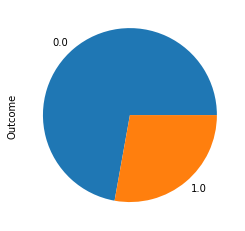

In [58]:
dados['Outcome'].value_counts().plot.pie()

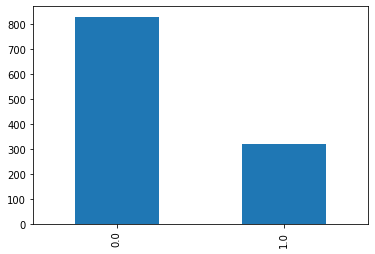

In [59]:
dados['Outcome'].value_counts().plot.bar()

##Análise de alguns descritores

Analisei, inicialmente, alguns descritores que são mais conhecidos para avaliar a drug-likeness de fármacos, que são: SlogP, AMW, NumHBD e NumHBA. 

**SlogP** é o coeficiente de partição predito para o sitema n-octanol/água que expressa a lipofilicidade do composto, ou seja, se tem mais afinidade por um ambiente aquoso ou lipofílico. Quanto maior, mais lipofílico e portanto maior a tendência de migrar para um ambiente não-aquoso [9](https://en.wikipedia.org/wiki/Partition_coefficient).

**AMW** é o peso molecular do composto.

**NumHBD** é o número de grupos doadores de ligação de hidrogênio [8](https://pt.wikipedia.org/wiki/Liga%C3%A7%C3%A3o_de_hidrog%C3%AAnio).

**NumHBA** é o número de grupos aceitadores de ligação de hidrogênio [8](https://pt.wikipedia.org/wiki/Liga%C3%A7%C3%A3o_de_hidrog%C3%AAnio).


In [60]:
dados_outcome1 = dados[dados['Outcome'] == 1.0]
dados_outcome1.describe()

,Outcome,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumAmideBonds,NumHeteroAtoms,NumHeavyAtoms,NumAtoms,NumRings,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumSaturatedCarbocycles,NumAliphaticCarbocycles,FractionCSP3,Chi0v,Chi1v,Chi2v,Chi3v,Chi4v,Chi1n,Chi2n,Chi3n,Chi4n,HallKierAlpha,kappa1,kappa2,kappa3,...,MQN3,MQN4,MQN5,MQN6,MQN7,MQN8,MQN9,MQN10,MQN11,MQN12,MQN13,MQN14,MQN15,MQN16,MQN17,MQN18,MQN19,MQN20,MQN21,MQN22,MQN23,MQN24,MQN25,MQN26,MQN27,MQN28,MQN29,MQN30,MQN31,MQN32,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
count,320.0,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.00000,320.000000,320.000000,320.000000,320.000000,320.00000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.00000,320.000000,320.000000,320.00000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,...,320.000000,320.000000,320.0,320.000000,320.0,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.0,320.000000,320.000000,320.000000,320.000000,320.00000,320.000000,320.000000,320.00000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.0,320.0,320.000000,320.000000
mean,1.0,3.067555,86.915963,131.578807,41.794875,307.460000,307.074213,3.671875,0.934375,3.646875,0.80000,3.268750,0.518750,4.431250,21.812500,42.45625,3.071875,1.728125,0.746875,1.343750,0.334375,0.581250,0.98125,1.393750,0.165625,0.36250,0.401556,13.175920,7.973571,6.314565,4.701104,3.462016,7.623005,5.895064,4.356664,3.185329,-1.774656,14.952952,6.237296,3.099253,...,0.268750,0.025000,0.0,0.228125,0.0,0.559375,1.556250,1.371875,0.184375,21.812500,6.368750,0.900000,0.028125,11.434375,5.134375,0.0,3.646875,5.246875,3.671875,0.934375,0.80000,0.018750,0.021875,3.24375,2.234375,0.778125,0.150000,9.393750,5.753125,0.259375,0.028125,0.009375,0.478125,2.331250,0.218750,0.006250,0.0,0.0,2.378125,1.440625
std,0.0,1.432569,22.859263,34.098470,25.422439,82.555258,82.415744,1.776322,0.982004,2.287417,0.77823,1.501188,0.909524,2.105737,5.744494,11.49477,1.278404,0.810099,0.893194,1.133955,0.585140,0.652671,0.77153,0.709071,0.566078,0.77974,0.183634,3.441646,2.295961,1.999102,1.768519,1.485556,2.179179,1.849384,1.638684,1.392194,0.668117,3.998479,1.988645,1.222875,...,0.539614,0.156369,0.0,0.476228,0.0,0.714542,1.280414,1.131962,0.475486,5.744494,3.079148,0.921359,0.165589,4.989840,2.320160,0.0,2.287417,2.880862,1.776322,0.982004,0.77823,0.135853,0.146504,1.60034,1.794647,0.904962,0.374752,3.658797,2.706950,0.552770,0.165589,0.096521,0.662111,1.143179,0.414046,0.078933,0.0,0.0,2.429732,1.984953
min,1.0,-1.029300,28.515600,54.170005,3.240000,129.159000,129.078979,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,7.000000,10.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,5.208833,2.505913,1.831971,0.878310,0.000000,1.372020,0.915281,0.292770,0.000000,-3.970000,5.927257,1.713319,0.760830,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,1.0,1.955890,74.349125,113.825905,23.470000,258.019000,257.842534,2.000000,0.000000,2.000000,0.00000,2.000000,0.000000,3.000000,19.000000,34.00000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.00000,0.290588,11.222076,6.625685,4.948542,3.399956,2.397567,6.320507,4.683635,3.252019,2.197678,-2.

In [61]:
dados_outcome0 = dados[dados['Outcome'] == 0.0]
dados_outcome0.describe()

,Outcome,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumAmideBonds,NumHeteroAtoms,NumHeavyAtoms,NumAtoms,NumRings,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumSaturatedCarbocycles,NumAliphaticCarbocycles,FractionCSP3,Chi0v,Chi1v,Chi2v,Chi3v,Chi4v,Chi1n,Chi2n,Chi3n,Chi4n,HallKierAlpha,kappa1,kappa2,kappa3,...,MQN3,MQN4,MQN5,MQN6,MQN7,MQN8,MQN9,MQN10,MQN11,MQN12,MQN13,MQN14,MQN15,MQN16,MQN17,MQN18,MQN19,MQN20,MQN21,MQN22,MQN23,MQN24,MQN25,MQN26,MQN27,MQN28,MQN29,MQN30,MQN31,MQN32,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
count,830.0,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,...,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.0,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.0,830.00000,830.000000,830.000000
mean,0.0,2.569119,97.561135,152.703114,87.671145,370.555929,370.166956,6.156627,2.253012,5.162651,1.986747,5.175904,0.555422,7.053012,25.708434,48.679518,2.837349,1.645783,0.830120,1.191566,0.574699,0.450602,0.666265,1.071084,0.379518,0.525301,0.423307,15.303460,9.107473,7.343596,5.284364,3.818467,8.539753,6.704730,4.770140,3.393245,-2.179614,18.672188,7.722874,4.264656,...,0.212048,0.022892,0.028916,0.314458,0.037349,1.015663,1.373494,3.463855,0.303614,25.708434,9.916867,1.956627,0.050602,10.761446,4.845783,0.0,5.162651,9.944578,6.136145,2.253012,1.978313,0.042169,0.066265,5.790361,3.169880,1.651807,0.314458,8.012048,6.384337,0.385542,0.046988,0.046988,0.591566,2.089157,0.031325,0.001205,0.0,0.03012,1.756627,1.004819
std,0.0,2.187552,37.509199,58.507067,46.945317,141.042582,140.946905,3.184636,1.935282,3.405991,1.594946,2.918333,1.005984,3.393684,9.994899,21.817777,1.398363,1.160186,1.153506,1.405032,0.748838,0.754140,0.910040,0.892811,0.898633,1.157640,0.247789,6.116504,3.683800,3.258792,2.621048,2.139198,3.726441,3.276033,2.640135,2.138942,1.111324,7.933505,3.762027,2.529337,...,0.565045,0.185627,0.289140,0.610450,0.240231,1.091030,1.579504,2.280249,0.721452,9.994899,5.351264,1.454762,0.240312,6.649303,3.065088,0.0,3.405991,5.543930,3.200124,1.935282,1.592962,0.201095,0.253695,3.213648,2.799071,1.517240,0.598477,4.261348,3.847891,0.862450,0.238531,0.222843,0.691619,1.171331,0.187632,0.034711,0.0,0.18459,2.596936,2.055321
min,0.0,-8.895300,14.505600,28.538798,0.000000,75.067000,75.032028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.432812,0.966406,0.476054,0.110193,0.000000,0.966406,0.476054,0.110193,0.000000,-7.620000,4.230000,1.499520,0.539771,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000
25%,0.0,1.286450,72.712700,112.540412,55.122500,279.340750,279.142445,4.000000,1.000000,3.000000,1.000000,3.000000,0.000000,5.000000,19.000000,33.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,11

Algumas observações sobre as duas tabelas acima:

* Observa-se que dentre os 320 compostos ativos no SNC, há um valor médio de 3.06 de SlogP, 307.46 de AMW, 0.8 de NumHBD e 3.2 de NumHBA.

* Dentre os 830 compostos inativos no SNC, há um valor médio de 2.57 de SlogP, 370.55 de AMW, 1.9 de NumHBD e 5.1 de NumHBA.

A seguir, plotei os respectivos histogramas e boxplots para facilitar a análise visual destes valores. Em azul os dados para fármacos inativos no SNC e em laranja os fármacos ativos no SNC.

### Histogramas de SlogP, AMW, NumHBD e NumHBA:

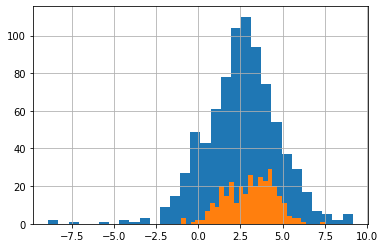

In [62]:
dados_outcome0['SlogP'].hist(bins = 30)
dados_outcome1['SlogP'].hist(bins = 30)

Com relação ao logP não houve muita diferença entre os ativos/inativos de SNC olhando esse histograma, pois o pico de suas distribuições normais estão ambos em torno dos valores de 2,5 - 3,0. Pressupõe-se que este é portanto um descritor que não foi capaz de visualmente/aparentemente distingui-los.

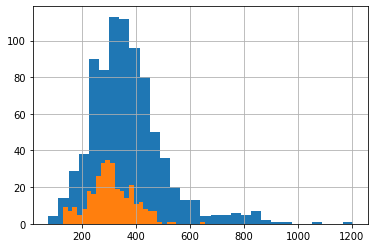

In [63]:
dados_outcome0['AMW'].hist(bins = 30)
dados_outcome1['AMW'].hist(bins = 30)

Com relação ao AMW obseva-se uma ligeira diferença entre os ativos/inativos de SNC olhando este histograma, estando o pico da distribuição dos ativos, em laranja, mais a esquerda. O que corrobora o que é conhecido da literatura, que compostos com menor peso molecular devem ser mais desejáveis para atuar no SNC.

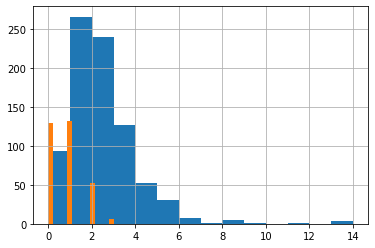

In [64]:
dados_outcome0['NumHBD'].hist(bins = 14)
dados_outcome1['NumHBD'].hist(bins = 14)

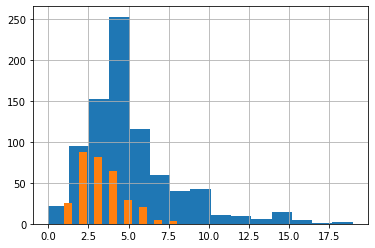

In [65]:
dados_outcome0['NumHBA'].hist(bins = 15)
dados_outcome1['NumHBA'].hist(bins = 15)

Com relação ao num de doadores/aceitadores de H, tiveram pequenas diferenças mas nada muito conclusivo.

### Boxplotss de SlogP, AMW, NumHBD e NumHBA:

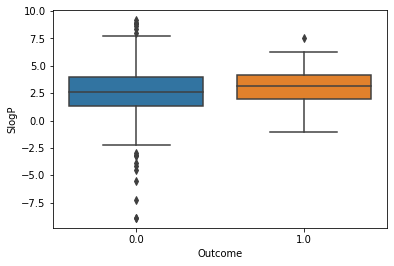

In [66]:
import seaborn as sns

sns.boxplot(y='SlogP', x='Outcome', data=dados)

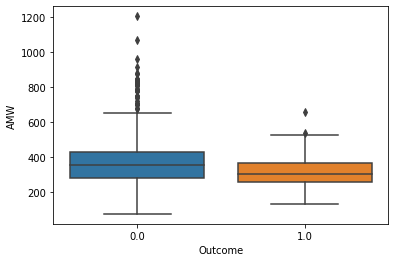

In [67]:
sns.boxplot(y='AMW', x='Outcome', data=dados)

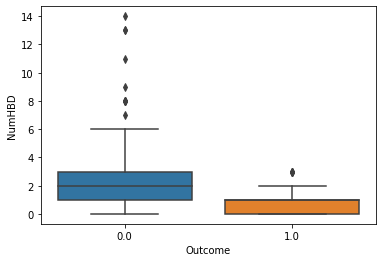

In [68]:
sns.boxplot(y='NumHBD', x='Outcome', data=dados)

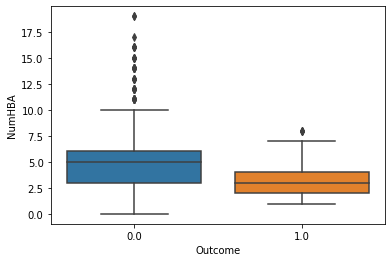

In [69]:
sns.boxplot(y='NumHBA', x='Outcome', data=dados)

Os gráficos de boxplot também permitiram análises similares às dos histogramas.

Com exceção do descritor logP, todos os boxplots mostram uma posição da média central das caixas laranjas (ativos CNS) um pouco abaixo quando comparada as caixas médias azuis (inativos CNS). Também há um maior número de outliers para os inativos de CNS de acordo com todos os boxplots.

Esta análise destes 4 descritores importantes foi feita para se ter uma ideia do comportamento e distribuição dos compostos com base nestas propriedades. COnsiderando, entretanto, que temos mais de 100 descritores para gerar nossos modelos, fiz, a seguir, uma filtragem dos descritores mais significantes.

## Filtrando os descritores 

Em estudos que correlacionamos atividade-estrutura (em menção aos estudos de Relações Quantitativas entre Estrutura Química e Atividade Biológica, do inglês QSAR), é importante incluir na geração dos modelos apenas aqueles descritores que apresentam variâncias e correlações adequadas e estatisticamente significativas [10](http://services.igi-global.com/resolvedoi/resolve.aspx?doi=10.4018/IJQSPR.20200701.oa1),[11](https://doi.org/10.1021/jm4004285),[12](https://onlinelibrary.wiley.com/doi/10.1002/minf.202000113). Por isso aplicamos dois filtros para selecionar os descritores:


### 1) filtro de baixa variância

Primeiramente, foram filtrados os descritores que apresentam uma variância abaixo de 10% dentre os valores calculados para os compostos da tabela.

Foram exluídos 16 descritores (colunas que aprentavam valores muito constantes de valores), sobrevivendo após este filtro 101 descritores.

In [70]:
#low variance filter 1

from sklearn.feature_selection import VarianceThreshold

xlowvar, ylowvar = dados.drop(columns=['Compound_name', 'Outcome']), dados.Outcome

# Processing
xlowvar = xlowvar.replace(-999, 0)

# Def low variance filter (10% threshold)
def variance_filter(data, threshold=0.1):
	selector = VarianceThreshold(threshold)
	selector.fit(data)
	return data[data.columns[selector.get_support(indices=True)]]

# Apply filter
xlowvar_fit = variance_filter(xlowvar)
dadoslowvar_fit = pd.concat([ylowvar, xlowvar_fit], axis=1)

# Output
dadoslowvar_fit

,Outcome,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumAmideBonds,NumHeteroAtoms,NumHeavyAtoms,NumAtoms,NumRings,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumSaturatedCarbocycles,NumAliphaticCarbocycles,Chi0v,Chi1v,Chi2v,Chi3v,Chi4v,Chi1n,Chi2n,Chi3n,Chi4n,HallKierAlpha,kappa1,kappa2,kappa3,slogp_VSA1,...,peoe_VSA4,peoe_VSA5,peoe_VSA6,peoe_VSA7,peoe_VSA8,peoe_VSA9,peoe_VSA10,peoe_VSA11,peoe_VSA12,peoe_VSA13,peoe_VSA14,MQN1,MQN2,MQN3,MQN6,MQN8,MQN9,MQN10,MQN11,MQN12,MQN13,MQN14,MQN16,MQN17,MQN19,MQN20,MQN21,MQN22,MQN23,MQN26,MQN27,MQN28,MQN29,MQN30,MQN31,MQN32,MQN35,MQN36,MQN41,MQN42
0,0.0,3.40510,111.9397,169.532263,74.73,393.443,393.168856,7,1,10,1,7,0,7,29,52,3,3,0,0,1,0,0,2,0,0,16.474650,9.107800,6.071032,4.082845,2.682613,9.107800,6.071032,4.082845,2.682613,-3.34,20.395692,10.271589,5.347720,14.790515,...,0.0,6.42335,11.986801,24.265468,36.923024,18.730465,25.358947,11.499024,0.000000,0.00000,0.000000,22,0,0,0,1,2,4,0,29,13,0,9,8,10,11,7,1,1,3,10,0,0,9,7,0,0,3,2,1
1,1.0,3.15380,81.8100,122.062379,32.67,284.746,284.071641,3,0,1,0,2,1,4,20,33,3,2,0,1,0,0,1,2,0,0,11.762478,6.707603,5.081522,3.603931,2.477600,6.329639,4.645087,3.368834,2.305497,-2.13,12.881279,5.097713,2.207529,4.899910,...,0.0,0.00000,41.932775,18.199101,23.197208,11.399071,6.544756,0.000000,5.907180,0.00000,0.000000,16,0,1,0,0,2,1,0,20,3,1,11,7,1,4,3,0,0,3,0,0,0,10,7,0,0,2,2,1
2,0.0,1.87370,95.4914,158.196447,94.83,380.456,380.199902,5,3,2,3,5,0,6,27,56,4,0,3,4,0,0,0,0,3,4,16.002357,10.018038,9.605336,8.798593,7.163867,10.018038,9.605336,8.798593,7.163867,-1.11,19.217052,5.707293,2.095427,0.000000,...,0.0,0.00000,19.420579,50.518856,23.168709,6.103966,17.876693,11.566490,0.000000,0.00000,0.000000,21,1,0,0,0,0,5,0,27,8,2,19,1,2,10,5,3,3,8,1,1,0,8,5,4,1,3,6,3
3,0.0,4.85710,135.4488,202.106377,67.59,463.622,463.283492,6,1,10,1,5,0,6,34,71,4,3,1,1,1,1,1,2,0,0,20.665464,12.478969,9.800268,7.227151,4.854513,12.478969,9.800268,7.227151,4.854513,-2.70,24.425381,10.702470,5.338429,0.000000,...,0.0,0.00000,36.398202,76.382826,25.614301,23.055274,5.824404,0.000000,0.000000,0.00000,5.969305,28,0,0,0,0,3,3,0,34,14,1,14,8,10,9,6,1,1,5,6,1,1,13,8,0,1,3,2,1
4,0.0,2.32510,216.8862,350.592298,195.38,843.065,842.514005,16,4,11,4,16,0,16,59,133,4,0,3,4,0,3,4,0,0,0,36.994568,21.287169,17.808902,12.378645,9.100541,21.287169,17.808902,12.378645,9.100541,-1.90,49.752268,22.450693,13.302378,0.000000,...,0.0,0.00000,31.227818,93.907651,32.414103,54.687512,36.805992,18.870080,0.000000,0.00000,5.969305,43,0,0,0,2,0,10,4,59,26,2,32,2,11,30,16,4,4,17,6,2,0,14,19,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,1.0,1.45780,58.2715,93.811648,46.61,219.240,219.089543,4,0,2,0,3,2,4,16,29,2,1,1,1,0,1,1,1,0,0,9.102680,5.208983,3.682584,2.655537,1.752292,5.208983,3.682584,2.655537,1.752292,-1.84,10.670300,4.346020,1.909839,4.736863,...,0.0,0.00000,0.000000,30.686290,18.529030,7.109798,5.749512,0.000000,5.907180,5.90718,0.000000,12,0,0,0,0,1,3,0,16,4,2,8,3,2,7,4,0,0,3,1,1,0,7,4,0,1,1,0,0
1146,0.0,2.84502,76.3743,121.152884,59.30,291.734,291.066221,4,1,4,1,3,0,5,20,34,2,2,0,0,1,0,0,1,0,0,11.938675,6.449053,5.069280,3.428678,2.343161,6.071089,4.632844,3.176702,2.217173,-2.07,14.341447,5.507400,2.750559,0.000000,...,0.0,0.00000,11.600940,42.819024,23.327685,12.114750,0.000000,0.000000,5.783245,0.00000,5.969305,15,0,1,0,0,1,3,0,20,8,2,6,5,4,7,4,1,1,6,1,2,0,5,6,0,1,1,0,0
1147,1.0,4.48700,91.7310,131.315096,6.48,298.455,298.150370,2,0,4,0,3,0,3,21,43,3,2,0,1,0,0,1,2,0,0,13.729538,8.247389,7.099309,4.833356,4.066350,7.430892,6.015532,3.703088,2.970601,-

### 2) filtro de alta correlação

Em seguida foram filtrados os descritores que apresentam uma correlação muito alta entre si e/ou com o valor da variável independente (Outcome), que indica a atividade ou atividade no SNC dos compostos.

Analisei primeiro a matriz de correlação geral para os 101 descritores e plotei o respectivo heatmap para visualização.

In [71]:
#analisando correlations entre os remanescentes pós filtração de low variance

dadoslowvar_fit.loc[:, 'SlogP':'MQN42'].corr()

,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumAmideBonds,NumHeteroAtoms,NumHeavyAtoms,NumAtoms,NumRings,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumSaturatedCarbocycles,NumAliphaticCarbocycles,Chi0v,Chi1v,Chi2v,Chi3v,Chi4v,Chi1n,Chi2n,Chi3n,Chi4n,HallKierAlpha,kappa1,kappa2,kappa3,slogp_VSA1,slogp_VSA2,...,peoe_VSA4,peoe_VSA5,peoe_VSA6,peoe_VSA7,peoe_VSA8,peoe_VSA9,peoe_VSA10,peoe_VSA11,peoe_VSA12,peoe_VSA13,peoe_VSA14,MQN1,MQN2,MQN3,MQN6,MQN8,MQN9,MQN10,MQN11,MQN12,MQN13,MQN14,MQN16,MQN17,MQN19,MQN20,MQN21,MQN22,MQN23,MQN26,MQN27,MQN28,MQN29,MQN30,MQN31,MQN32,MQN35,MQN36,MQN41,MQN42
SlogP,1.000000,0.486358,0.414771,-0.448354,0.355922,0.355476,-0.336415,-0.536540,0.245110,-0.488671,-0.272859,-0.158752,-0.258404,0.378651,0.390703,0.391452,0.405270,0.031089,0.075286,-0.037447,-0.114311,-0.066198,0.538972,0.142032,0.149018,0.424303,0.426216,0.389573,0.381604,0.370881,0.445617,0.416224,0.409086,0.392180,-0.245663,0.323644,0.352101,0.252987,-0.289143,-0.177321,...,0.019128,-0.045758,0.589534,0.657905,0.265694,0.075050,-0.201249,-0.198178,-0.201381,-0.131437,-0.063653,0.580675,0.164376,0.183737,-0.101438,-0.270402,-0.063502,-0.263869,-0.109117,0.378651,0.186434,-0.125985,0.302209,0.466854,0.245110,-0.316997,-0.335694,-0.536540,-0.483904,-0.052671,0.203605,0.051233,0.019038,0.550206,0.188978,0.087008,-0.017717,0.449466,0.173786,0.119484
SMR,0.486358,1.000000,0.990663,0.423371,0.959131,0.959225,0.570952,0.138805,0.641980,0.191060,0.594342,0.218199,0.547443,0.980026,0.954874,0.625832,0.329993,0.354010,0.376006,0.105894,0.356995,0.395620,0.325162,0.151047,0.142748,0.988283,0.973161,0.915593,0.847835,0.780033,0.971925,0.920460,0.842808,0.768475,-0.590894,0.954056,0.908052,0.692161,0.171279,0.683361,...,0.007668,0.052851,0.443482,0.614186,0.566542,0.502028,0.400824,0.182307,0.211495,0.112580,0.170677,0.963906,0.058287,-0.018569,0.045993,0.114037,0.247032,0.482432,0.283671,0.980026,0.736145,0.354687,0.714196,0.402294,0.641980,0.559981,0.570162,0.138805,0.197757,0.593607,0.506128,0.355497,0.022635,0.606841,0.737952,0.229841,0.173784,0.542100,0.264617,0.215218
LabuteASA,0.414771,0.990663,1.000000,0.504352,0.979420,0.979514,0.641835,0.193473,0.628064,0.247202,0.659999,0.244338,0.628951,0.994590,0.954199,0.623578,0.285952,0.390834,0.409109,0.106239,0.391231,0.427607,0.269697,0.169323,0.157670,0.993115,0.975996,0.926115,0.859334,0.791882,0.971418,0.926353,0.849575,0.776073,-0.592016,0.972638,0.906691,0.690051,0.183235,0.725420,...,0.043460,0.064712,0.385860,0.573315,0.544904,0.531617,0.455420,0.235210,0.237611,0.139954,0.232788,0.945715,0.106439,-0.009787,0.052155,0.121513,0.249158,0.560109,0.333995,0.994590,0.756329,0.399897,0.729133,0.357463,0.628064,0.639583,0.641081,0.193473,0.253761,0.657065,0.488324,0.362604,0.045613,0.567676,0.764750,0.265789,0.196089,0.522790,0.266233,0.218426
TPSA,-0.448354,0.423371,0.504352,1.000000,0.560010,0.560444,0.938360,0.777110,0.368441,0.775672,0.850584,0.344263,0.876280,0.540147,0.440968,0.112327,-0.032087,0.179725,0.140913,0.214470,0.239359,0.224492,-0.218996,0.025307,-0.009639,0.481192,0.457676,0.448193,0.370305,0.305439,0.410826,0.393249,0.308189,0.247835,-0.416256,0.576994,0.479380,0.419533,0.449335,0.632307,...,0.103939,0.106861,-0.205932,-0.088555,0.096965,0.406119,0.598419,0.395179,0.396889,0.324418,0.417212,0.276640,-0.035870,-0.138135,0.170980,0.452925,0.204101,0.839312,0.359123,0.540147,0.555714,0.606153,0.244469,-0.028040,0.368441,0.933835,0.938476,0.777110,0.777955,0.720255,0.269779,0.341492,0.142720,-0.073516,0.469592,0.129165,0.172142,-0.011818,0.006916,0.021681
AMW,0.355922,0.959131,0.979420,0.560010,1.000000,0.999997,0.680708,0.248946,0.614934,0.297932,0.687013,0.249327,0.704303,0.966349,0.903890,0.568876,0.265307,0.359998,0.369651,0.117767,0.378824,0.413150,0.234220,0.139643,0.120278,0.974175,0.955822,0.913321,0.839074,0.775151,0

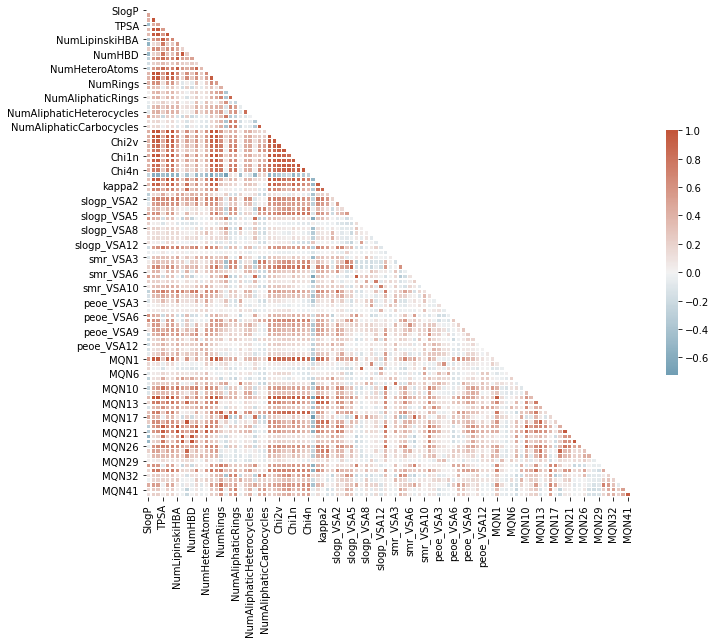

In [72]:
import matplotlib.pyplot as plt
import numpy as np

corr = dadoslowvar_fit.loc[:, 'SlogP':'MQN42'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Observa-se uma quantidade considerável de descritores altamente correlacionados entre si (cor próxima ao vermelho). Indicando que a aplicação do filtro de alta correlação vai ser adequada para remover descritores redundantes e facilitando a posterior geração de modelos considerando-se apenas aqueles descritores mais significantes.

In [73]:
#aplicando filtro 2 de correlation

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

# Select data
xvar, yvar = dadoslowvar_fit.drop(columns=['Outcome']), dadoslowvar_fit.Outcome

# Generate models and fit the data
clf = Pipeline([('feature_selection', SelectFromModel(LinearSVC(penalty="l2", dual=True))), 
    ('classification', RandomForestClassifier())])
clf.fit(xvar, yvar)

# Filter the data
s = clf.named_steps['feature_selection'].get_support()
xvar_fit = xvar[xvar.columns[s]]
dados_varfilter = pd.concat([yvar, xvar_fit], axis=1)

dados_varfilter

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Outcome,SMR,LabuteASA,NumLipinskiHBA,NumHBD,NumAmideBonds,NumAtoms,NumAromaticRings,NumAromaticCarbocycles,NumSaturatedCarbocycles,NumAliphaticCarbocycles,Chi3v,Chi4v,Chi1n,Chi2n,Chi3n,Chi4n,kappa2,kappa3,slogp_VSA12,smr_VSA1,smr_VSA2,peoe_VSA4,peoe_VSA5,peoe_VSA6,peoe_VSA13,MQN2,MQN8,MQN10,MQN11,MQN13,MQN14,MQN17,MQN23,MQN26,MQN27,MQN28,MQN30,MQN36,MQN42
0,0.0,111.9397,169.532263,7,1,0,52,3,2,0,0,4.082845,2.682613,9.107800,6.071032,4.082845,2.682613,10.271589,5.347720,0.000000,18.947452,0.0,0.0,6.42335,11.986801,0.00000,0,1,4,0,13,0,8,1,3,10,0,9,3,1
1,1.0,81.8100,122.062379,3,0,1,33,2,2,0,0,3.603931,2.477600,6.329639,4.645087,3.368834,2.305497,5.097713,2.207529,11.600940,4.794537,0.0,0.0,0.00000,41.932775,0.00000,0,0,1,0,3,1,7,0,3,0,0,10,2,1
2,0.0,95.4914,158.196447,5,3,0,56,0,0,3,4,8.798593,7.163867,10.018038,9.605336,8.798593,7.163867,5.707293,2.095427,0.000000,29.299072,0.0,0.0,0.00000,19.420579,0.00000,1,0,5,0,8,2,1,3,8,1,1,8,3,3
3,0.0,135.4488,202.106377,6,1,0,71,3,2,0,0,7.227151,4.854513,12.478969,9.800268,7.227151,4.854513,10.702470,5.338429,0.000000,14.637928,0.0,0.0,0.00000,36.398202,0.00000,0,0,3,0,14,1,8,1,5,6,1,13,3,1
4,0.0,216.8862,350.592298,16,4,0,133,0,0,0,0,12.378645,9.100541,21.287169,17.808902,12.378645,9.100541,22.450693,13.302378,0.000000,67.910088,0.0,0.0,0.00000,31.227818,0.00000,0,2,10,4,26,2,2,4,17,6,2,14,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,1.0,58.2715,93.811648,4,0,2,29,1,1,0,0,2.655537,1.752292,5.208983,3.682584,2.655537,1.752292,4.346020,1.909839,0.000000,14.325937,0.0,0.0,0.00000,0.000000,5.90718,0,0,3,0,4,2,3,0,3,1,1,7,1,0
1146,0.0,76.3743,121.152884,4,1,0,34,2,1,0,0,3.428678,2.343161,6.071089,4.632844,3.176702,2.217173,5.507400,2.750559,11.600940,14.695602,0.0,0.0,0.00000,11.600940,0.00000,0,0,3,0,8,2,5,1,6,1,2,5,1,0
1147,1.0,91.7310,131.315096,2,0,0,43,2,2,0,0,4.833356,4.066350,7.430892,6.015532,3.703088,2.970601,6.121752,3.089998,11.761885,0.000000,0.0,0.0,0.00000,42.951090,0.00000,0,1,0,0,7,0,6,0,3,2,2,9,3,2
1148,0.0,75.8192,124.922262,7,3,0,32,2,1,0,0,4.017734,2.789255,5.646848,4.111293,2.642157,1.690132,5.761536,3.542232,11.600940,22.736013,0.0,0.0,0.00000,11.600940,0.00000,0,2,4,1,8,3,5,3,6,2,1,6,1,0


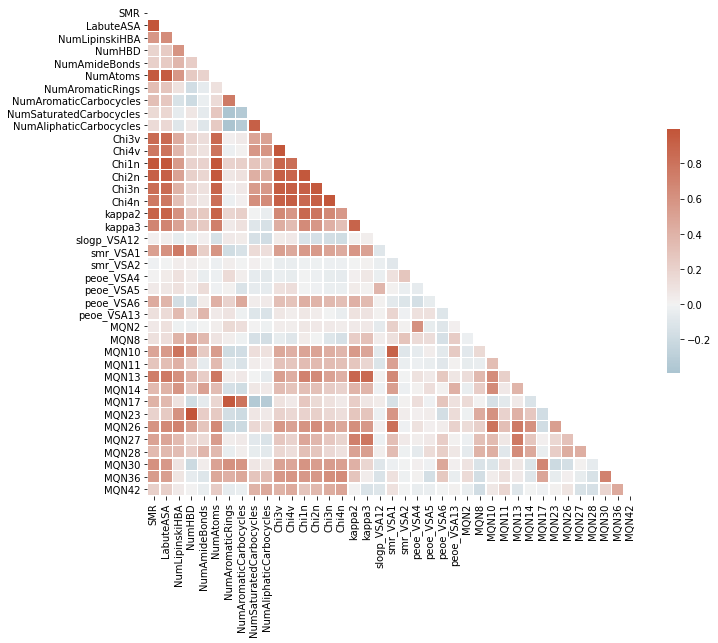

In [74]:
corr2 = dados_varfilter.loc[:, 'SMR':'MQN42'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr2, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr2, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Após a aplicação do filtro de correlação, restaram 39 descritores, conforme mostrado na tabela e heatmap logo acima. Estes foram considerados os mais altamente significantes e apropriados para a construção dos nossos modelos de machine learning.

## Construção dos modelos de machine learning

Foram usadas as seguintes técnicas de machine learning para a construção dos modelos: regressão logística, árvore de decisão e random forest. Foram utilizados os algoritmos implementados no sklearn.

Todos os modelos foram validados com respeito as respectivas acurácias, a partir do uso de séries de treinamento e teste, bem como comparando-se com um modelo ingênuo que fora gerado.

Vale ressaltar que os dados utilizados consistem agora de 1150 compostos (sendo 830 inativos CNS e 320 ativos CNS) e 39 descritores químicos.

Para construção dos modelos de machine learning, este conjunto foi subdividido aleatoriamente em série de treinamento (80%) e de teste (20%). 

### Modelo ingênuo - DUMMY

In [75]:
#modelo ingenuo (dummy) para comparativo
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

x = dados_varfilter.drop(['Outcome'], axis=1)
y = dados_varfilter['Outcome']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

model_dummy = DummyClassifier('most_frequent')
model_dummy.fit(x_treino, y_treino)
predicao_dummy = model_dummy.predict(x_teste)
accuracy_score(y_teste, predicao_dummy)

0.7217391304347827

O modelo ingênuo de dummy do sklearn é definido como aquele que irá fazer predições usando as regras mais simples. Ainda, o subparâmetro utilizado é definido como “most_frequent”: always predicts the most frequent label in the training set [13](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). 

Então este pode ser usado como uma referência de modelo simples, esperando-se que os demais modelos mais sofisticados irão minimamente apresentar melhor valores de acurácia. Em outras palavras, espero que os próximos modelos apresentem valores melhores do que de 72%, que foi a métrica do dummy.

### Modelo de regressão logística

In [76]:
#1o modelo de logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = dados_varfilter.drop(['Outcome'], axis=1)
y = dados_varfilter['Outcome']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_rlogistic = LogisticRegression(max_iter=10000)
modelo_rlogistic.fit(x_treino, y_treino)
modelo_rlogistic.score(x_teste, y_teste)

0.8347826086956521


Utilizei inicialmente o algoritmo de regressão logística [14](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) para construir o primeiro modelo de machine learning. O modelo resultante apresentou uma acurácia de 83% para predizer corretamente a habilidade de determinado composto ser ativo no SNC.

### Modelo de árvore de decisão

In [77]:
#2o modelo de arvore unica

from sklearn.tree import DecisionTreeClassifier

x = dados_varfilter.drop(['Outcome'], axis=1)
y = dados_varfilter['Outcome']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.8260869565217391

O segundo modelo foi construído usando um classificador de árvore de decisão, inicialmente setando o parâmetro de max_depth igual a 3. O modelo apresentou 82% de acurácia. Ligeiramente menor do que o primeiro modelo de logisticregression.

A seguir mostramos uma representação gráfica de como funciona o algoritmo de árvore de decisão:


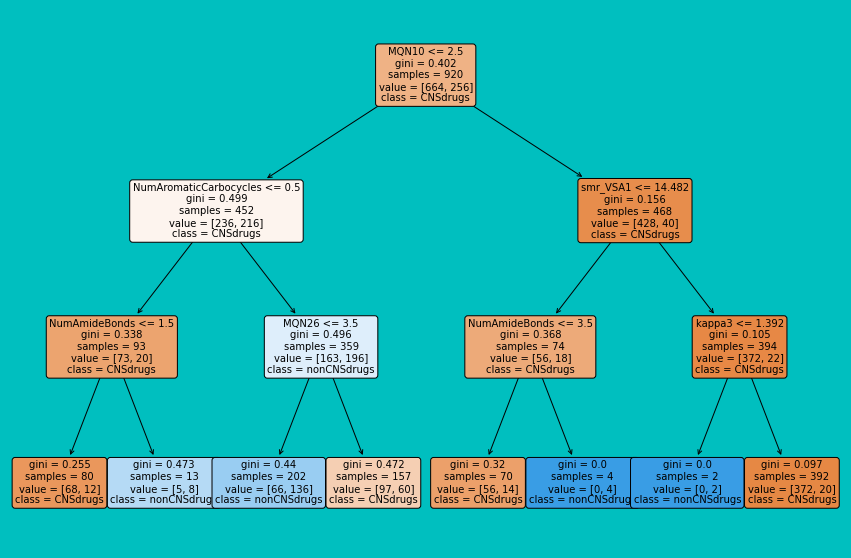

In [78]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, ax = plt.subplots(figsize=(15,10), facecolor='c')
tree.plot_tree(modelo_arvore,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=['CNSdrugs', 'nonCNSdrugs'])
plt.show()

O parâmetro max_depth é definido como: the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples [15](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

Com o intuito de avaliar se seria possível melhorar o modelo, alterando-se este parâmetro, foi-se variando sistematicamente de 1 a 15 os valores do mesmo.

In [79]:
#verificando a influencia da variacao de parametro (max_depth) da arvore

from sklearn.tree import DecisionTreeClassifier

x = dados_varfilter.drop(['Outcome'], axis=1)
y = dados_varfilter['Outcome']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

teste=[]
treino=[]
for i in range(1,15):
    modelo_arvore = DecisionTreeClassifier(max_depth = i)
    modelo_arvore.fit(x_treino, y_treino)
    teste.append(modelo_arvore.score(x_teste, y_teste))
    treino.append(modelo_arvore.score(x_treino, y_treino))

In [80]:
teste

[0.7217391304347827,
 0.7478260869565218,
 0.8260869565217391,
 0.8434782608695652,
 0.8391304347826087,
 0.8391304347826087,
 0.8391304347826087,
 0.8608695652173913,
 0.8391304347826087,
 0.8217391304347826,
 0.8304347826086956,
 0.8217391304347826,
 0.8347826086956521,
 0.7956521739130434]

In [81]:
treino

[0.7217391304347827,
 0.7576086956521739,
 0.8076086956521739,
 0.8271739130434783,
 0.8619565217391304,
 0.8967391304347826,
 0.9173913043478261,
 0.9423913043478261,
 0.9576086956521739,
 0.9815217391304348,
 0.991304347826087,
 0.9945652173913043,
 0.9978260869565218,
 1.0]

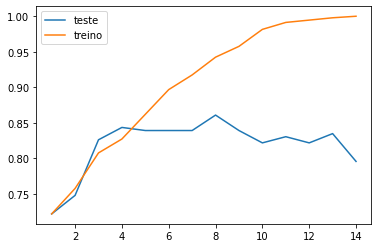

In [82]:
import seaborn as sns

sns.lineplot(x=range(1,15), y = teste, label='teste')
sns.lineplot(x=range(1,15), y = treino, label='treino')

Plotando os valores de acurácia obtidos para ambas as séries (de treinamento e de teste) observamos que existe um valor máximo, até aonde ambas as curvas crescem juntas (até ~4). A partir deste ponto a série de teste apresenta acurácias constantes ou decrescentes. Assim, verifica-se que até este valor, de fato, é indiferente continuar aumentando o maxdepth e só acarretará a propagação de overfitting.

### Modelo de random forest

In [83]:
#3o modelo de random forest (MELHOR!)

from sklearn.ensemble import RandomForestClassifier

x = dados_varfilter.drop(['Outcome'], axis=1)
y = dados_varfilter['Outcome']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)

0.8739130434782608

Por fim, geramos o modelo de random forest. 

O estimador random forest encaixa um determinado número de classificadores que funcionam via árvores de decisão em várias sub amostragens do dataset e calcula a média pra aumentar a preditividade de acurácia e controle de overfitting [16](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

O modelo gerado apresentou o melhor valor de acurácia igual a 87%. Este modelo foi, portanto, o mais indicado para predizer robustamente se determinado composto é ou não apto para atuar como candidato a fármaco no SNC.


## Considerações finais

Os 3 modelos obtidos apresentaram acurácias acima de 80%, com destaque para o modelo de random forest com 87% de acurácia.

In [86]:
tabledata = {'Acurácia do modelo em %':[83.48, 82.61, 87.39]}   
table = pd.DataFrame(tabledata, index =['Modelo de regressão logística', 'Modelo de árvore de decisão', 'Modelo de random forest'])  
table

,Acurácia do modelo em %
Modelo de regressão logística,83.48
Modelo de árvore de decisão,82.61
Modelo de random forest,87.39


Estes modelos podem vir a se tornar muito úteis para predizer o potencial de fármacos para atuar no sistema nervoso central (SNC). Mais especificamente a ideia é que estes permitam a predição da *drug-likeness* de compostos virem a ser novos fármacos que atuem no SNC, ou seja, potenciais candidatos a fármacos para doenças neurodegenerativas e demais disturbios psiquiátricos.

Vale mencionar que este estudo preliminar deverá passar por de demais etapas de refinamento considerando-se as boas práticas de modelagem [17](http://doi.wiley.com/10.1002/minf.201000061) em estudos com essa finalidade.

## Referências

[1] https://link.springer.com/article/10.1007/s00210-016-1216-8

[2] https://link.springer.com/article/10.1007/s10822-016-9993-1

[3] https://onlinelibrary.wiley.com/doi/abs/10.1002/3527603743.ch17

[4] https://doi.org/10.3797/scipharm.0802-05

[5] https://doi.org/10.3389/fchem.2018.00162

[6] http://dx.doi.org/10.1021/acs.jmedchem.8b01388

[7] RDKit: Open-source cheminformatics. http://www.rdkit.org

[8] esqueceu o que é ligação de hidrogênio?! Aqui: https://pt.wikipedia.org/wiki/Liga%C3%A7%C3%A3o_de_hidrog%C3%AAnio

[9] mais informações sobre o logP aqui: https://en.wikipedia.org/wiki/Partition_coefficient

[10] http://services.igi-global.com/resolvedoi/resolve.aspx?doi=10.4018/IJQSPR.20200701.oa1

[11] https://doi.org/10.1021/jm4004285

[12] https://onlinelibrary.wiley.com/doi/10.1002/minf.202000113

[13] https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

[14] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

[15] https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

[16] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

[17] http://doi.wiley.com/10.1002/minf.201000061
